In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import feature_selection
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection

In [2]:
df = pd.read_csv("2019-Nov.csv", decimal = '.')

In [3]:
df.describe()

,product_id,category_id,price,user_id
count,6.750198e+07,6.750198e+07,6.750198e+07,6.750198e+07
mean,1.251406e+07,2.057898e+18,2.924593e+02,5.386397e+08
std,1.725741e+07,2.012549e+16,3.556745e+02,2.288516e+07
min,1.000365e+06,2.053014e+18,0.000000e+00,1.030022e+07
25%,1.305977e+06,2.053014e+18,6.924000e+01,5.164762e+08
50%,5.100568e+06,2.053014e+18,1.657700e+02,5.350573e+08
75%,1.730075e+07,2.053014e+18,3.603400e+02,5.610794e+08
max,1.000286e+08,2.187708e+18,2.574070e+03,5.799699e+08


In [4]:
df.shape

(67501979, 9)

In [5]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [6]:
df.isnull().values.sum()

31122259

In [7]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64

In [8]:
df.loc[pd.isnull(df.category_code),'category_code'] = 'Other.Other'

In [9]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code          0
brand            9224078
price                  0
user_id                0
user_session          10
dtype: int64

In [10]:
df['category_id_new'] = df['category_id']

In [11]:
df.loc[(df.category_code == 'Other.Other'),'category_id'] = 4444443555631882655

In [12]:
df.loc[pd.isnull(df.brand),'brand'] = 'Unknown'

In [13]:
df.isnull().sum()

event_time          0
event_type          0
product_id          0
category_id         0
category_code       0
brand               0
price               0
user_id             0
user_session       10
category_id_new     0
dtype: int64

In [14]:
df_demo = pd.read_csv("customer_demographics_all.csv")

In [15]:
df_demo.isnull().sum()

user_id                0
age_range              0
marital_status         0
rented                 0
family_size            0
no_of_children    124783
income_bracket         0
gender                 0
state                  0
city                   0
job                    0
dtype: int64

In [16]:
merged_df = pd.merge(left=df, right=df_demo, left_on='user_id', right_on='user_id')

In [17]:
merged_df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_id_new,age_range,marital_status,rented,family_size,no_of_children,income_bracket,gender,state,city,job
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2053013555631882655,70+,Married,0,2,NaN,4,Female,Florida,Tallahassee,Retired
1,2019-11-01 00:00:36 UTC,view,1004184,2053013555631882655,electronics.smartphone,xiaomi,463.15,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2053013555631882655,70+,Married,0,2,NaN,4,Female,Florida,Tallahassee,Retired
2,2019-11-01 00:00:47 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2053013555631882655,70+,Married,0,2,NaN,4,Female,Florida,Tallahassee,Retired
3,2019-11-01 00:00:50 UTC,view,1005234,2053013555631882655,electronics.smartphone,xiaomi,398.72,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2053013555631882655,70+,Married,0,2,NaN,4,Female,Florida,Tallahassee,Retired
4,2019-11-01 00:01:48 UTC,view,1003898,2053013555631882655,electronics.smartphone,oneplus,540.30,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33,2053013555631882655,70+,Married,0,2,NaN,4,Female,Florida,Tallahassee,Retired


In [18]:
visitor = merged_df['user_id'].nunique()
print ("visitors: {}".format(visitor))

visitors: 176639


In [73]:
visitor_by_date = d.drop_duplicates().groupby(['event_time'])['user_id'].agg(['count']).sort_values(by=['event_time'], ascending=True)

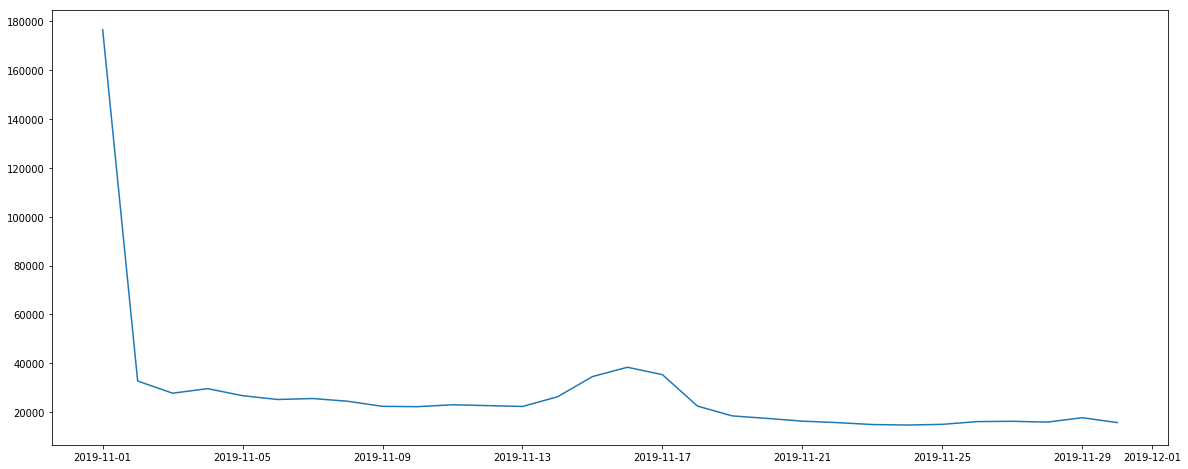

In [75]:
x = pd.Series(visitor_by_date.index.values).apply(lambda s: datetime.datetime.strptime(s, '%Y-%m-%d').date())
y = visitor_by_date['count']
plt.rcParams['figure.figsize'] = (20,8)

plt.plot(x,y)
plt.show()

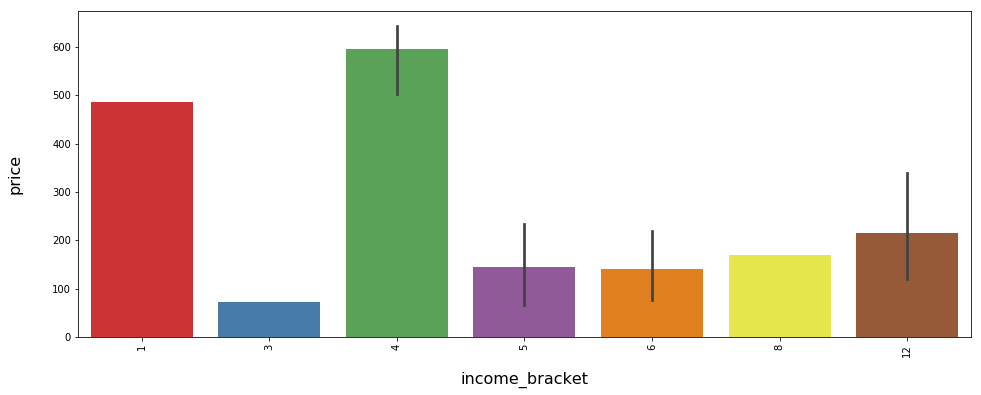

In [94]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='income_bracket', y='price', data=df_targets.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000275C6AAF358>,
      dtype=object)

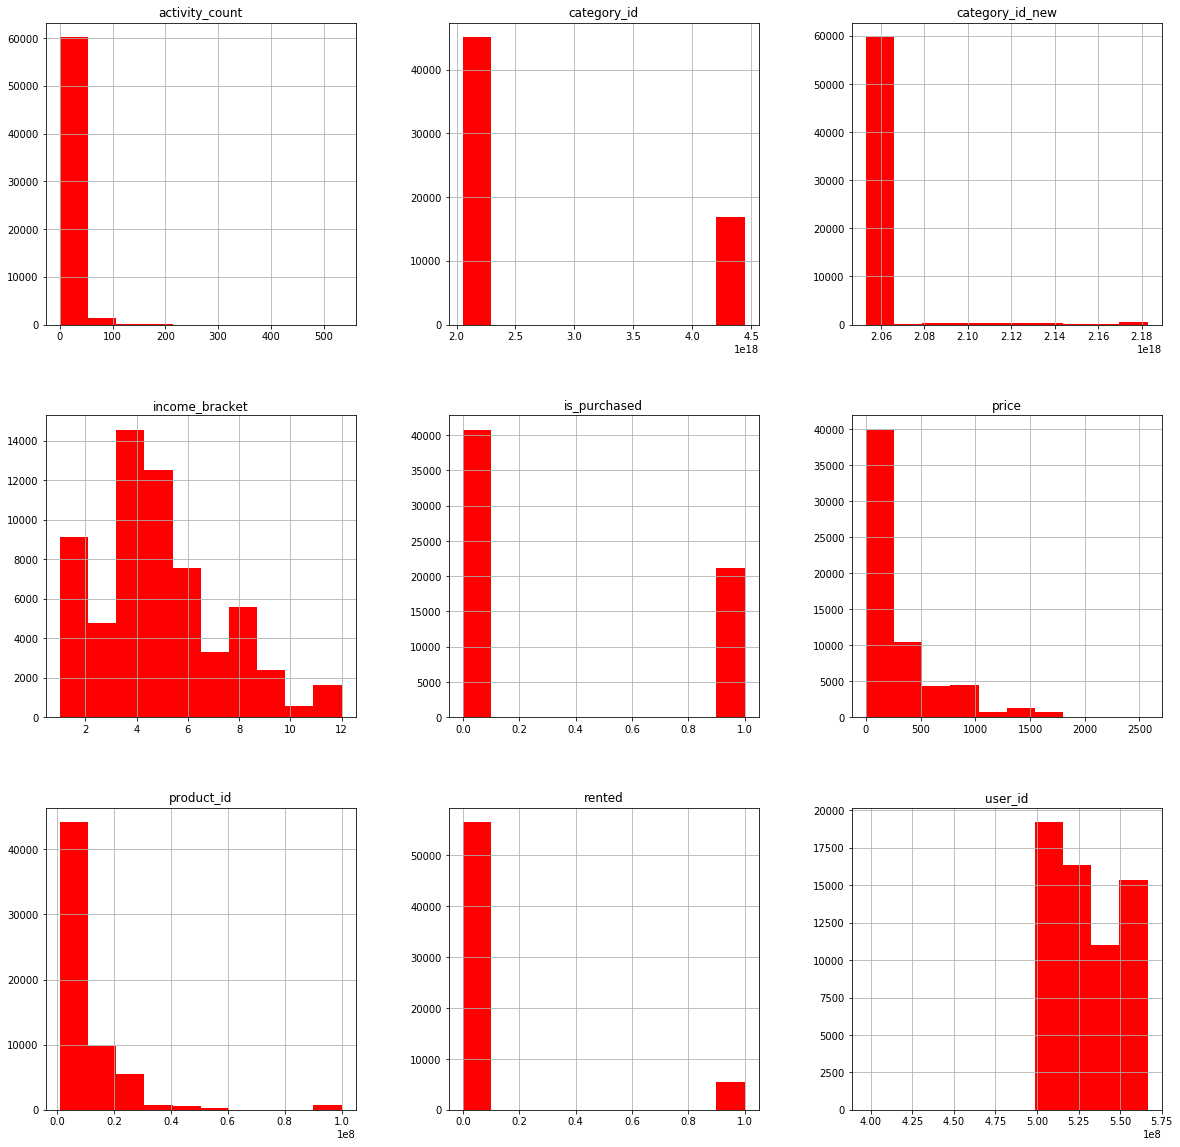

In [91]:
df_targets.hist(bins=10, figsize=(20,20) , color = 'r')

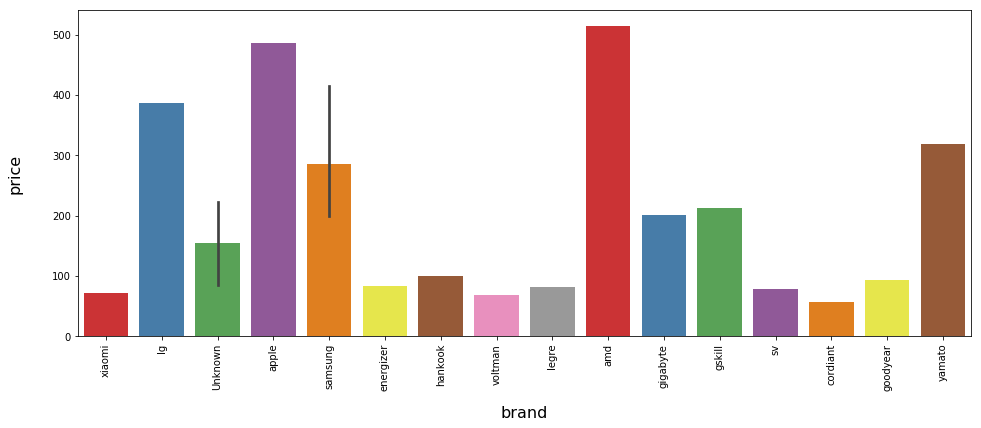

In [92]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='brand', y='price', data=df_targets.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

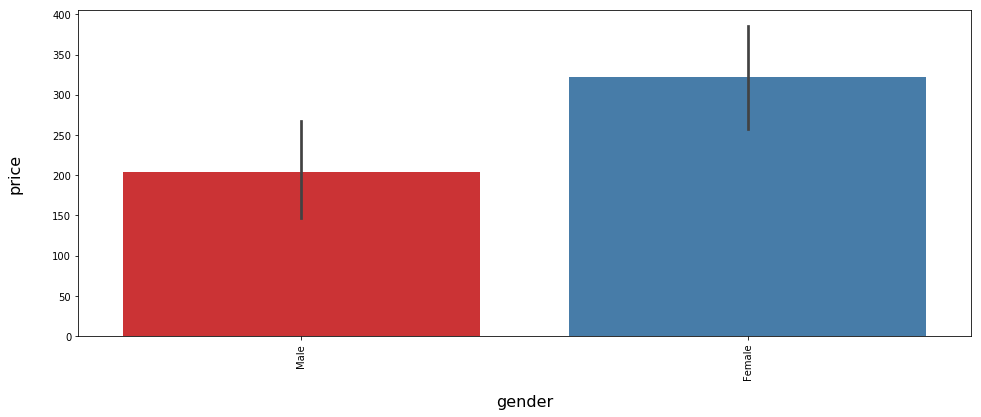

In [93]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='gender', y='price', data=df_targets.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [19]:
d = merged_df.loc[:,['event_time','user_id']]

In [20]:
d['event_time'] = d['event_time'].apply(lambda s: str(s)[0:10])

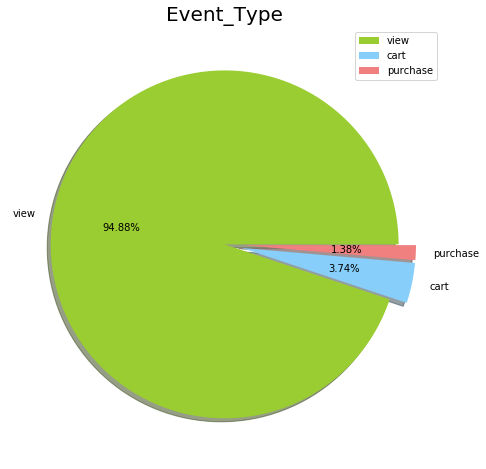

In [21]:
labels = ['view', 'cart','purchase']
size = merged_df['event_type'].value_counts()
colors = ['yellowgreen', 'lightskyblue','lightcoral']
explode = [0, 0.1,0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Event_Type', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [22]:
purchase = merged_df.loc[merged_df['event_type'] == 'purchase']
purchase = purchase.dropna(axis='rows')
purchase.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_id_new,age_range,marital_status,rented,family_size,no_of_children,income_bracket,gender,state,city,job
72,2019-11-03 10:26:38 UTC,purchase,1005212,2053013555631882655,electronics.smartphone,samsung,191.12,561587266,6544384a-fa35-441c-9fbf-0bc13a0c0b47,2053013555631882655,26-35,Single,0,3,1,3,Male,North Dakota,Fargo,Admin
84,2019-11-06 18:38:12 UTC,purchase,4801876,2053013554658804075,electronics.audio.headphone,apple,33.44,561587266,4afbb7ae-d4fc-4df7-8fa8-cf63e1fcfd4d,2053013554658804075,26-35,Single,0,3,1,3,Male,North Dakota,Fargo,Admin
1364,2019-11-01 02:24:28 UTC,purchase,1201504,2172371436436455782,electronics.tablet,samsung,154.16,515849878,f6843fd3-5502-4c64-801f-c296faeefaee,2172371436436455782,26-35,Married,0,4,2,9,Female,Massachusetts,Boston,IT
2348,2019-11-01 00:11:04 UTC,purchase,1002524,2053013555631882655,electronics.smartphone,apple,531.26,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2053013555631882655,46-55,Married,0,4,2,1,Male,Louisiana,Slidell,IT
2399,2019-11-10 21:55:30 UTC,purchase,1005174,2053013555631882655,electronics.smartphone,samsung,643.23,533326659,51d80ecc-b909-4119-8228-5fe85bff4610,2053013555631882655,36-45,Married,0,5+,3+,4,Male,Florida,Jacksonville,Teacher


In [23]:
top_sellers = purchase.groupby('brand')['brand'].agg(['count']).sort_values('count', ascending=False)
top_sellers.head(20)

,count
brand,
samsung,6711
apple,6258
Unknown,2673
xiaomi,2583
huawei,829
lucente,567
cordiant,474
oppo,454
sony,389


In [24]:
import datetime

In [25]:
df_targets = merged_df.loc[merged_df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['event_type', 'product_id','price', 'user_id','user_session'])
df_targets["is_purchased"] = np.where(df_targets["event_type"]=="purchase",1,0)
df_targets["is_purchased"] = df_targets.groupby(["user_session","product_id"])["is_purchased"].transform("max")
df_targets = df_targets.loc[df_targets["event_type"]=="cart"].drop_duplicates(["user_session","product_id","is_purchased"])
df_targets['event_weekday'] = df_targets['event_time'].apply(lambda s: str(datetime.datetime.strptime(str(s)[0:10], "%Y-%m-%d").weekday()))
df_targets.dropna(how='any', inplace=True)
df_targets["category_code_level1"] = df_targets["category_code"].str.split(".",expand=True)[0].astype('category')
df_targets["category_code_level2"] = df_targets["category_code"].str.split(".",expand=True)[1].astype('category')

In [59]:
cart_purchase_users = merged_df.loc[df["event_type"].isin(["cart","purchase"])].drop_duplicates(subset=['user_id'])
cart_purchase_users.dropna(how='any', inplace=True)
cart_purchase_users_all_activity = df.loc[df['user_id'].isin(cart_purchase_users['user_id'])]

In [27]:
activity_in_session = cart_purchase_users_all_activity.groupby(['user_session'])['event_type'].count().reset_index()
activity_in_session = activity_in_session.rename(columns={"event_type": "activity_count"})

In [28]:
df_targets = df_targets.merge(activity_in_session, on='user_session', how='left')
df_targets['activity_count'] = df_targets['activity_count'].fillna(0)
df_targets.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_id_new,...,income_bracket,gender,state,city,job,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2019-11-14 22:19:55 UTC,cart,1004743,2053013555631882655,electronics.smartphone,xiaomi,72.05,561587266,6b8da053-ad99-4d06-9b60-8d943836e53d,2053013555631882655,...,3,Male,North Dakota,Fargo,Admin,0,3,electronics,smartphone,7.0
1,2019-11-13 08:49:55 UTC,cart,3601437,2053013563810775923,appliances.kitchen.washer,lg,386.08,518085591,89983a59-275a-41f0-b623-8ceff6a6dee8,2053013563810775923,...,6,Female,Tennessee,Clarksville,IT,0,2,appliances,kitchen,26.0
2,2019-11-13 09:07:30 UTC,cart,13200925,2053013557192163841,furniture.bedroom.bed,Unknown,257.66,518085591,89983a59-275a-41f0-b623-8ceff6a6dee8,2053013557192163841,...,6,Female,Tennessee,Clarksville,IT,0,2,furniture,bedroom,26.0
3,2019-11-01 00:05:54 UTC,cart,1002542,2053013555631882655,electronics.smartphone,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2053013555631882655,...,1,Male,Louisiana,Slidell,IT,0,4,electronics,smartphone,0.0
4,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,2053013555631882655,...,4,Male,Florida,Jacksonville,Teacher,0,4,electronics,smartphone,1.0


In [29]:
df_targets.to_csv('training_data.csv')

In [30]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61957 entries, 0 to 61956
Data columns (total 25 columns):
event_time              61957 non-null object
event_type              61957 non-null object
product_id              61957 non-null int64
category_id             61957 non-null int64
category_code           61957 non-null object
brand                   61957 non-null object
price                   61957 non-null float64
user_id                 61957 non-null int64
user_session            61957 non-null object
category_id_new         61957 non-null int64
age_range               61957 non-null object
marital_status          61957 non-null object
rented                  61957 non-null int64
family_size             61957 non-null object
no_of_children          61957 non-null object
income_bracket          61957 non-null int64
gender                  61957 non-null object
state                   61957 non-null object
city                    61957 non-null object
job                   

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics

In [32]:
is_purcahase_set = df_targets[df_targets['is_purchased']== 1]
is_purcahase_set.shape[0]

21163

In [33]:
not_purcahase_set = df_targets[df_targets['is_purchased']== 0]
not_purcahase_set.shape[0]

40794

In [34]:
downsampled = pd.concat([is_purcahase_set, not_purcahase_set])
downsampled['is_purchased'].value_counts()

0    40794
1    21163
Name: is_purchased, dtype: int64

In [35]:
features = downsampled.loc[:,['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count','age_range','marital_status','gender','city','state','job']]

In [36]:
features.loc[:,'brand'] = LabelEncoder().fit_transform(downsampled.loc[:,'brand'].copy())
features.loc[:,'event_weekday'] = LabelEncoder().fit_transform(downsampled.loc[:,'event_weekday'].copy())
features.loc[:,'category_code_level1'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level1'].copy())
features.loc[:,'category_code_level2'] = LabelEncoder().fit_transform(downsampled.loc[:,'category_code_level2'].copy())
features.loc[:,'age_range'] = LabelEncoder().fit_transform(downsampled.loc[:,'age_range'].copy())
features.loc[:,'marital_status'] = LabelEncoder().fit_transform(downsampled.loc[:,'marital_status'].copy())
features.loc[:,'gender'] = LabelEncoder().fit_transform(downsampled.loc[:,'gender'].copy())
features.loc[:,'city'] = LabelEncoder().fit_transform(downsampled.loc[:,'city'].copy())
features.loc[:,'state'] = LabelEncoder().fit_transform(downsampled.loc[:,'state'].copy())
features.loc[:,'job'] = LabelEncoder().fit_transform(downsampled.loc[:,'job'].copy())




is_purchased = LabelEncoder().fit_transform(downsampled['is_purchased'])
features.head()

,brand,price,event_weekday,category_code_level1,category_code_level2,activity_count,age_range,marital_status,gender,city,state,job
5,1060,643.23,6,8,38,8.0,2,0,1,42,8,11
7,1060,169.67,5,8,38,0.0,2,0,1,31,32,4
8,1060,169.57,5,8,38,0.0,2,0,1,31,32,4
9,1060,169.52,6,8,38,0.0,2,0,1,31,32,4
10,1060,168.85,1,8,38,0.0,2,0,1,31,32,4


In [37]:
print(list(features.columns))

['brand', 'price', 'event_weekday', 'category_code_level1', 'category_code_level2', 'activity_count', 'age_range', 'marital_status', 'gender', 'city', 'state', 'job']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(features,is_purchased, test_size = 0.3, random_state = 0)

In [39]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("fbeta:",metrics.fbeta_score(y_test, y_pred, average='weighted', beta=0.5))

Accuracy: 0.7036797934151066
Precision: 0.6082329879585551
Recall: 0.3458048081515682
fbeta: 0.6773795044034205


Feature Importance

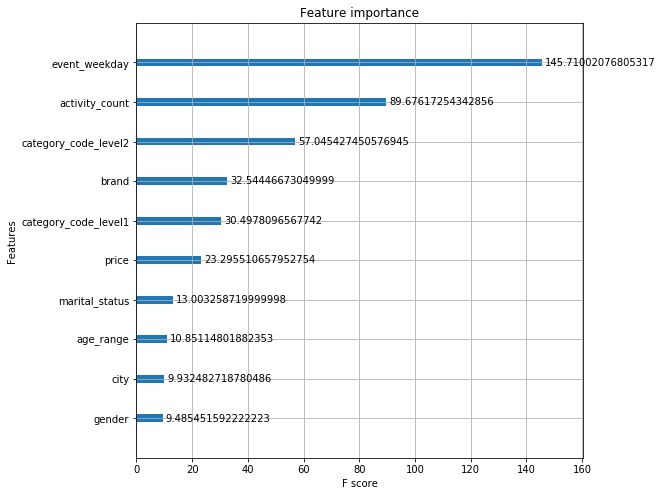

In [41]:
plot_importance(model, max_num_features=10, importance_type ='gain')
plt.rcParams['figure.figsize'] = (40,10)
plt.show()

In [42]:
def logistic_function_model(X_test,X_train, y_test, y_train):
    logist = LogisticRegression()
    logist.fit(X_train, y_train)
    y_pred = logist.predict(X_test)
    print(classification_report(y_test, y_pred))
    accuracy = logist.score(X_test, y_test)
    model = sm.Logit(y_train,X_train)
    result = model.fit()
    print('Mean Score:' + str(accuracy.mean()))
    print('Variance Score:' + str(accuracy.std()))
    print(result.summary())

In [43]:
D = features
F = is_purchased

In [44]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(D.values, k) for k in range(D.shape[1])]
vif["features"] = D.columns
vif.round(1)

,VIF Factor,features
0,3.0,brand
1,2.5,price
2,4.8,event_weekday
3,6.9,category_code_level1
4,6.5,category_code_level2
5,1.5,activity_count
6,4.0,age_range
7,1.3,marital_status
8,2.1,gender
9,3.7,city


In [45]:
D_train, D_test, E_train, E_test = train_test_split(D,F)

In [46]:
logist = LogisticRegression()

In [47]:
logist.fit(D_train,E_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
E_pred = logist.predict(D_test)

In [49]:
print(classification_report(E_test, E_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80     10236
           1       1.00      0.00      0.00      5254

   micro avg       0.66      0.66      0.66     15490
   macro avg       0.83      0.50      0.40     15490
weighted avg       0.78      0.66      0.53     15490



In [50]:
logist.score(D_test, E_test)

0.660942543576501

In [51]:
accuracy = cross_val_score(estimator = logist, X = D_test, y = E_test, cv = 10)
accuracy.mean()

0.6609425972266683

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(E_test, E_pred)
confusion_matrix

array([[10236,     0],
       [ 5252,     2]], dtype=int64)

In [53]:
D_train.shape, D_test.shape, E_train.shape, E_test.shape

((46467, 12), (15490, 12), (46467,), (15490,))

In [54]:
E_pred.shape

(15490,)

In [55]:
D = sm.add_constant(D)
model = sm.OLS(E_train,D_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1988.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:49:45   Log-Likelihood:                -31400.
No. Observations:               46467   AIC:                         6.282e+04
Df Residuals:                   46455   BIC:                         6.293e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
brand                 4.102e-05 

In [56]:
df_targets.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_id_new,...,income_bracket,gender,state,city,job,is_purchased,event_weekday,category_code_level1,category_code_level2,activity_count
0,2019-11-14 22:19:55 UTC,cart,1004743,2053013555631882655,electronics.smartphone,xiaomi,72.05,561587266,6b8da053-ad99-4d06-9b60-8d943836e53d,2053013555631882655,...,3,Male,North Dakota,Fargo,Admin,0,3,electronics,smartphone,7.0
1,2019-11-13 08:49:55 UTC,cart,3601437,2053013563810775923,appliances.kitchen.washer,lg,386.08,518085591,89983a59-275a-41f0-b623-8ceff6a6dee8,2053013563810775923,...,6,Female,Tennessee,Clarksville,IT,0,2,appliances,kitchen,26.0
2,2019-11-13 09:07:30 UTC,cart,13200925,2053013557192163841,furniture.bedroom.bed,Unknown,257.66,518085591,89983a59-275a-41f0-b623-8ceff6a6dee8,2053013557192163841,...,6,Female,Tennessee,Clarksville,IT,0,2,furniture,bedroom,26.0
3,2019-11-01 00:05:54 UTC,cart,1002542,2053013555631882655,electronics.smartphone,apple,486.80,549256216,dcbdc6e4-cd49-4ee8-95c5-e85f3c618fa1,2053013555631882655,...,1,Male,Louisiana,Slidell,IT,0,4,electronics,smartphone,0.0
4,2019-11-01 00:00:14 UTC,cart,1005014,2053013555631882655,electronics.smartphone,samsung,503.09,533326659,6b928be2-2bce-4640-8296-0efdf2fda22a,2053013555631882655,...,4,Male,Florida,Jacksonville,Teacher,0,4,electronics,smartphone,1.0
